## Observations and Insights

## Dependencies and starter code

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = r"C:\Users\david\Desktop\Matplotlib Challenge\Matplotlib-challenge\Mouse_metadata.csv"
study_results = r"C:\Users\david\Desktop\Matplotlib Challenge\Matplotlib-challenge\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

final_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

## Summary statistics

In [104]:
final_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [151]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_table = final_study_results.groupby("Drug Regimen")

tumor_mean = tumor_table["Tumor Volume (mm3)"].mean()
tumor_mean.head(15)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [152]:
tumor_median = tumor_table["Tumor Volume (mm3)"].median()
tumor_median.head(15)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [153]:
tumor_variance = tumor_table["Tumor Volume (mm3)"].var()
tumor_variance.head(15)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [46]:
tumor_standard_deviation = tumor_table["Tumor Volume (mm3)"].std()

In [154]:
tumor_standard_deviation.head(15)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [48]:
tumor_SEM = tumor_table["Tumor Volume (mm3)"].sem()

In [155]:
tumor_SEM.head(15)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [50]:
tumor_analysis_df = pd.DataFrame({"Mean": tumor_mean,
                                 "Median": tumor_median,
                                 "Variance": tumor_variance,
                                  "Standard Deviation": tumor_standard_deviation,
                                   "SEM": tumor_SEM})
tumor_analysis_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [51]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

tumor_count = tumor_table["Tumor Volume (mm3)"].nunique()
tumor_count



Drug Regimen
Capomulin    206
Ceftamin     154
Infubinol    154
Ketapril     164
Naftisol     162
Placebo      157
Propriva     136
Ramicane     204
Stelasyn     158
Zoniferol    158
Name: Tumor Volume (mm3), dtype: int64

Text(0, 0.5, 'Data Points')

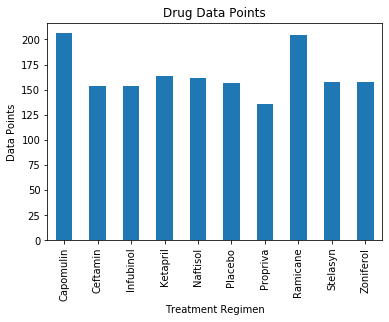

In [208]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

tumor_count.plot(kind="bar")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
                            "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = "vertical")

plt.title("Drug Data Points")
plt.xlabel("Treatment Regimen")
plt.ylabel("Data Points")

Text(0, 0.5, 'Data Points')

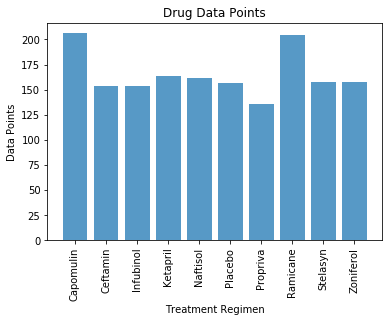

In [76]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(tumor_count))
plt.bar(x_axis, tumor_count, alpha = 0.75)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
                            "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = "vertical")

plt.title("Drug Data Points")
plt.xlabel("Treatment Regimen")
plt.ylabel("Data Points")

## Pie plots

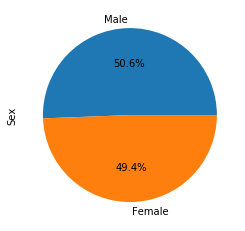

In [211]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender_count = final_study_results["Sex"].value_counts()
mice_gender_count.head()

mice_gender_count.plot(kind = "pie", autopct="%1.1f%%")


In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
sizes = [958, 935]

([<matplotlib.patches.Wedge at 0x18934423c08>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

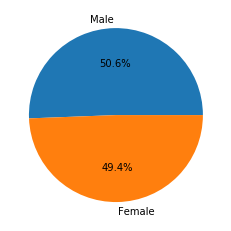

In [99]:
plt.pie(sizes, labels = labels, autopct="%1.1f%%")

## Quartiles, outliers and boxplots

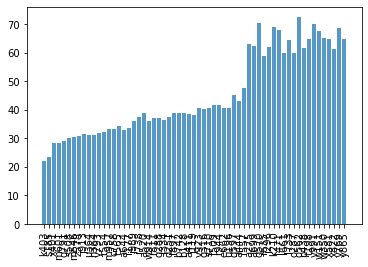

In [186]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

top_four = ['Ramicane','Capomulin', "Propriva", "Ceftamin"]
best_drugs = final_study_results[final_study_results['Drug Regimen'].isin(top_four)]
best_drugs = best_drugs[best_drugs['Timepoint']==45]

#x_axis = top_four
y = best_drugs["Tumor Volume (mm3)"]
plt.bar(range(len(y)),y, alpha = 0.75)
plt.xticks(range(len(y)),best_drugs['Mouse ID'], rotation = "vertical")
plt.show()

#ramicane_final = final_study_results.loc[]
#capomulin_final
#propriva_final   
#ceftamin_final     

#tumor_volume = final_study_results.loc[:,['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
#tumor_volume


In [167]:
best_drugs.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [138]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

matplotlib.pyplot.boxplot()

## Line and scatter plots

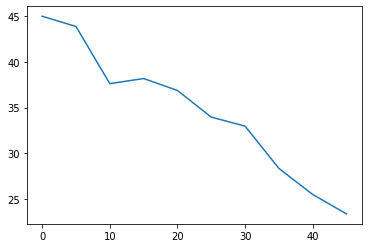

In [149]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Refer to class wrestling exercise (At Least I think)
# need to filter tumor data to only that drug

#capomulin_data = tumor_volume.loc["Timepoint","Tumor Volume"]

capomulin_data = final_study_results.loc[final_study_results["Mouse ID"] == "s185"]

x_axis = capomulin_data["Timepoint"]
y_axis = capomulin_data["Tumor Volume (mm3)"]

#capomulin_data = final_study_results.loc("Capomulin", "Drug Regimen":"Timepoint":"Tumor Volume (mm3)")

#time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

capomulin_data.head()

plt.plot(x_axis, y_axis)

In [198]:
broader_capomulin_data = final_study_results.loc[final_study_results["Drug Regimen"] == "Capomulin"]
broader_capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


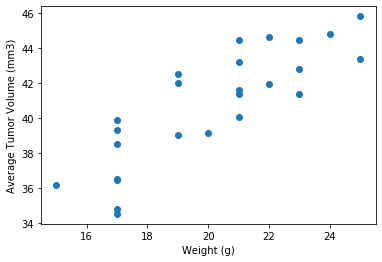

In [207]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


average_tumor_volume_scatterplot =  broader_capomulin_data.groupby(["Mouse ID"]).mean()
avg_tumor_mouse = average_tumor_volume_scatterplot["Tumor Volume (mm3)"]
mouse_weight = average_tumor_volume_scatterplot["Weight (g)"]


plt.scatter(mouse_weight, avg_tumor_mouse )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [59]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen